In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

dữ liệu không có NaN

In [5]:
# kiểm tra dữ liệu có bị trùng không
df.duplicated().sum()

23899

dữ liệu có ~24000 dòng bị trùng nhau, chiếm khoảng 9.5% dữ liệu gốc     
tuy nhiên dữ liệu không có id cho mỗi observation nên có thể xem mỗi observation là 1 cá thể riêng biệt và có thể có dữ liệu về tình trạng sức khỏe giống nhau. => có thể không cần thực hiện xóa dữ liệu trùng lặp

In [6]:
# đếm số giá trị  unique trong mỗi cột
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

hầu hết các biến trong dataset là biến nhị phân -> biến định tính       
các biến định tính không phải nhị phân bao gồm: Diabetes_012, GenHlth, Age, Education, Income       
các biến định lượng:  
- rời rạc: MentHlth, PhysHlth
- liên tục: BMI (trong dataset này thì được biểu diễn rời rạc)

### Biến định lượng

vẽ biểu đồ cho biến định lượng:

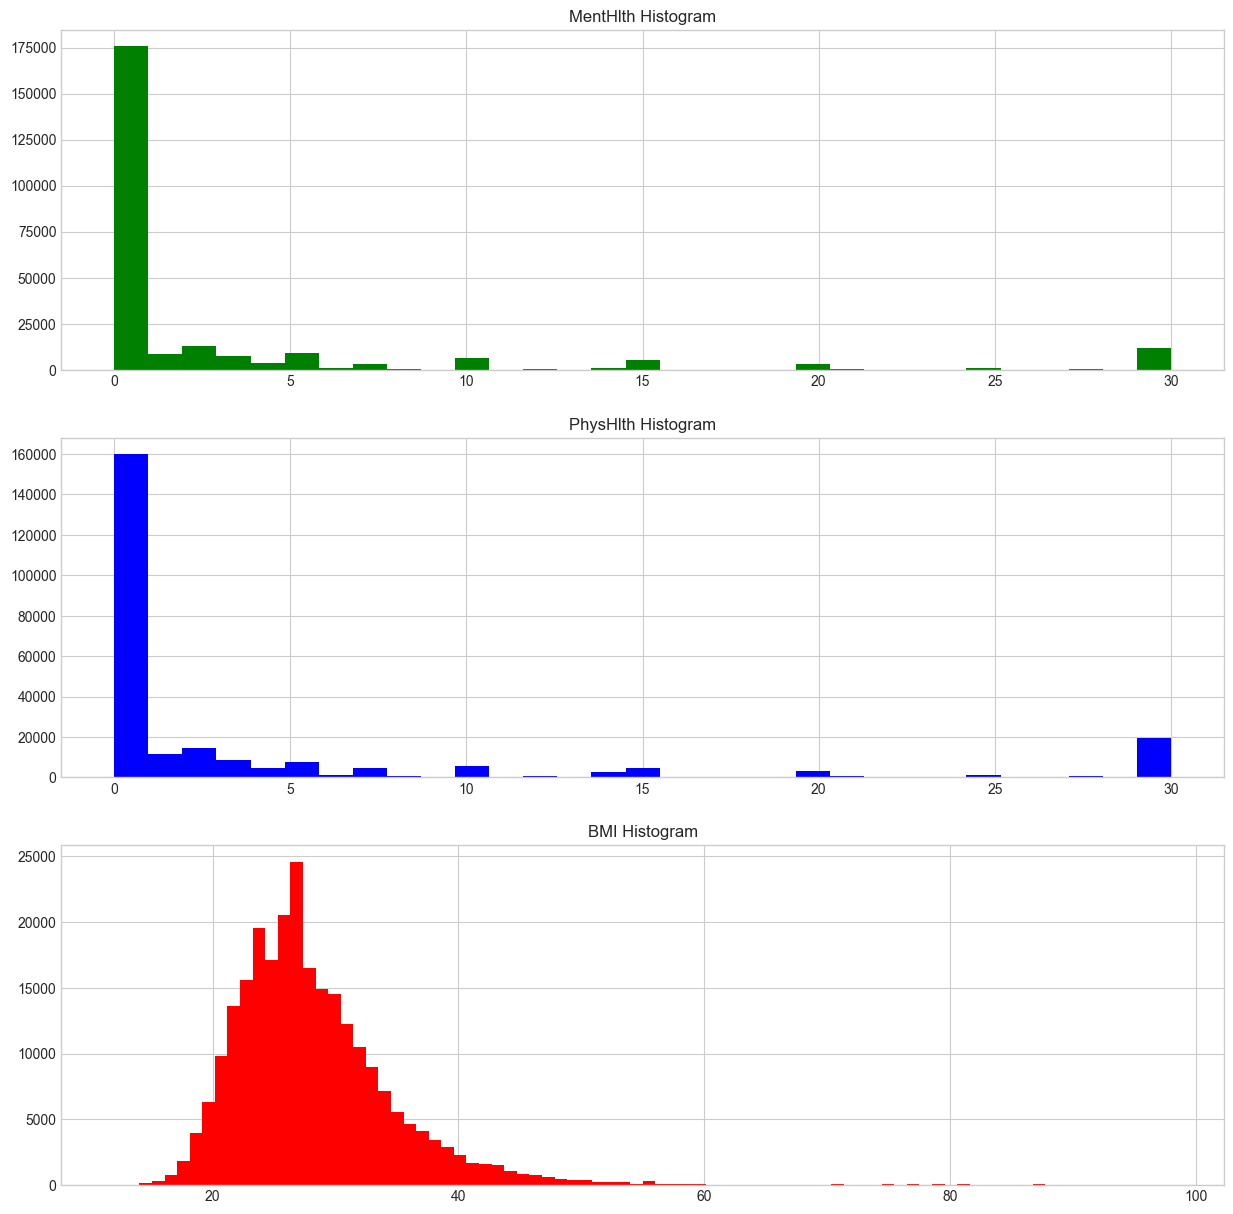

In [12]:
# ve tung bieu do density, histogram cho cac bien MentHlth, PhysHlth, BMI trong df 
plt.figure(figsize=(15, 15))
plt.subplot(3,1,1)
plt.hist(df['MentHlth'], bins=31, color='g')
plt.title('MentHlth Histogram')

plt.subplot(3,1,2)
plt.hist(df['PhysHlth'], bins=31, color='b')
plt.title('PhysHlth Histogram')

plt.subplot(3,1,3)
plt.hist(df['BMI'], bins=84, color='r')
plt.title('BMI Histogram')

plt.show()

MentHlth và PhysHlth chứa nhiều giá trị 0: phần lớn mọi người không có vấn đề về sức khỏe tinh thần và thể chất. Điều này cũng khá phù hợp với thực tế       
Histogram cho 2 biến này đương tối tương đồng -> có thể có đa cộng tuyến giữa 2 biến này


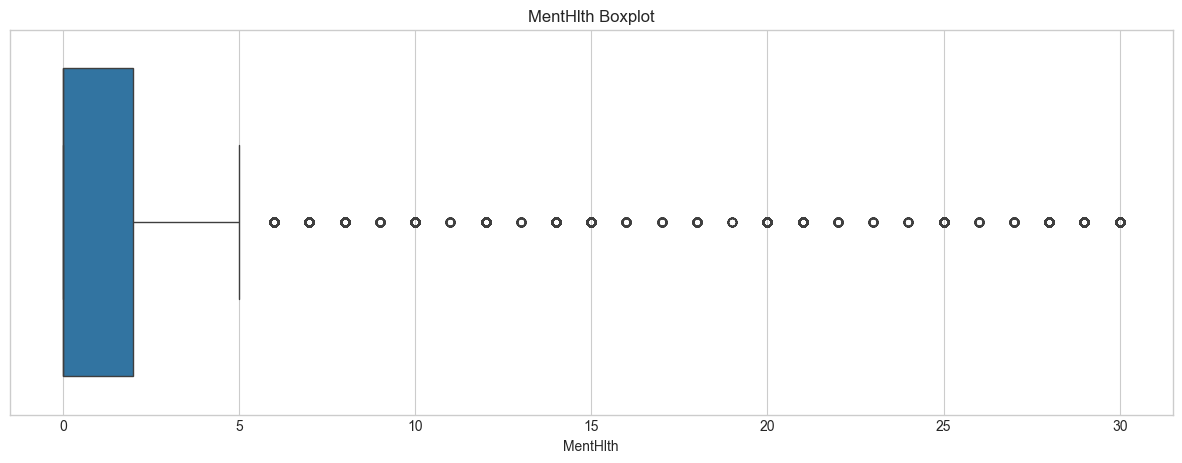

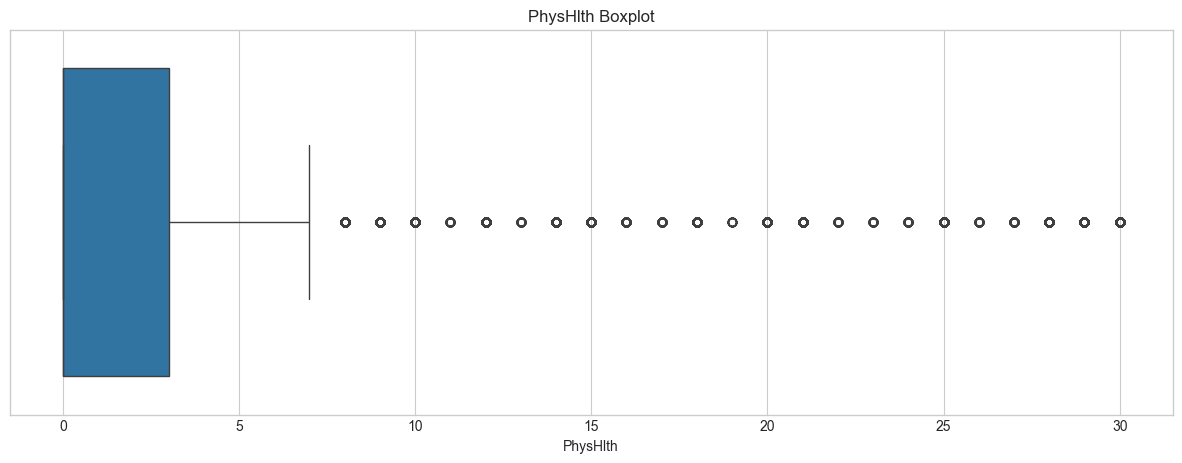

In [7]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='MentHlth', data=df, orient='h')
plt.title('MentHlth Boxplot')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='PhysHlth', data=df, orient='h')
plt.title('PhysHlth Boxplot')
plt.show()

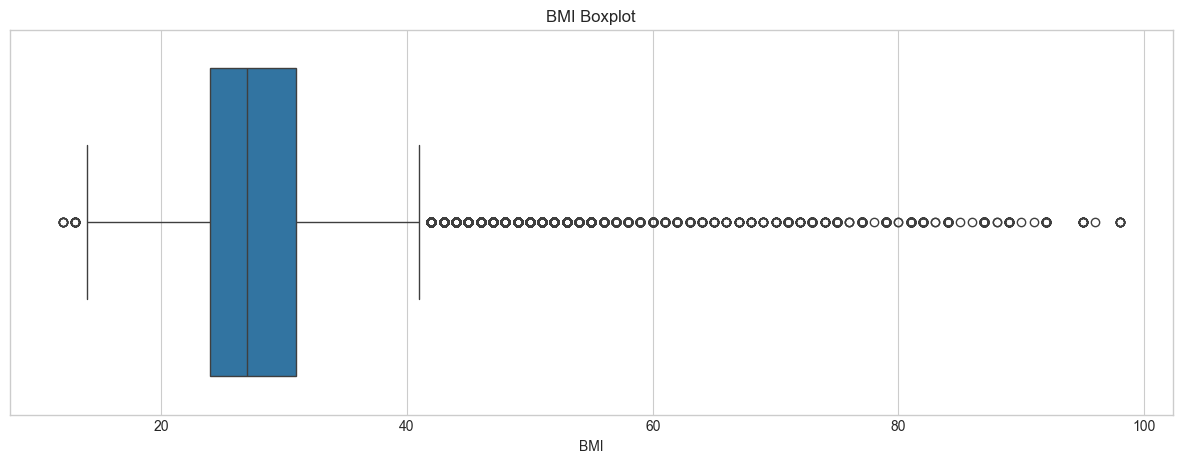

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='BMI', data=df, orient='h')
plt.title('BMI Boxplot')
plt.show()

In [32]:
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

thông qua boxplot và bảng summary thì ta thấy rõ hơn được phân bố của BMI tập trung chủ yếu vào khoảng [24,31] với trung bình là 28 độ lệch là 6, và có nhiều outlier có BMI lớn.

### Biến định tính

In [20]:
# lay ra nhung cot bien dinh tinh và tính phan tram 
for col in df.columns:
    if df[col].nunique() == 2:
        print(f"Column {col}: {df[col].value_counts(normalize=True)}")
        print()

Column HighBP: HighBP
0.0    0.570999
1.0    0.429001
Name: proportion, dtype: float64

Column HighChol: HighChol
0.0    0.575879
1.0    0.424121
Name: proportion, dtype: float64

Column CholCheck: CholCheck
1.0    0.96267
0.0    0.03733
Name: proportion, dtype: float64

Column Smoker: Smoker
0.0    0.556831
1.0    0.443169
Name: proportion, dtype: float64

Column Stroke: Stroke
0.0    0.959429
1.0    0.040571
Name: proportion, dtype: float64

Column HeartDiseaseorAttack: HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64

Column PhysActivity: PhysActivity
1.0    0.756544
0.0    0.243456
Name: proportion, dtype: float64

Column Fruits: Fruits
1.0    0.634256
0.0    0.365744
Name: proportion, dtype: float64

Column Veggies: Veggies
1.0    0.81142
0.0    0.18858
Name: proportion, dtype: float64

Column HvyAlcoholConsump: HvyAlcoholConsump
0.0    0.943803
1.0    0.056197
Name: proportion, dtype: float64

Column AnyHealthcare: AnyHealthcare
1.0    0.95105

dữ liệu cân bằng ở các biến (xấp xỉ 40-50%): HighBP, HighChol, Smoker, Sex      
=> không có sự bất thường về dữ liệu, tỉ lệ sex cân bằng cũng cho thấy dữ liệu khảo sát đều trên cả 2 giới tính

vẽ biểu đồ frequency cho từng biến định tính:

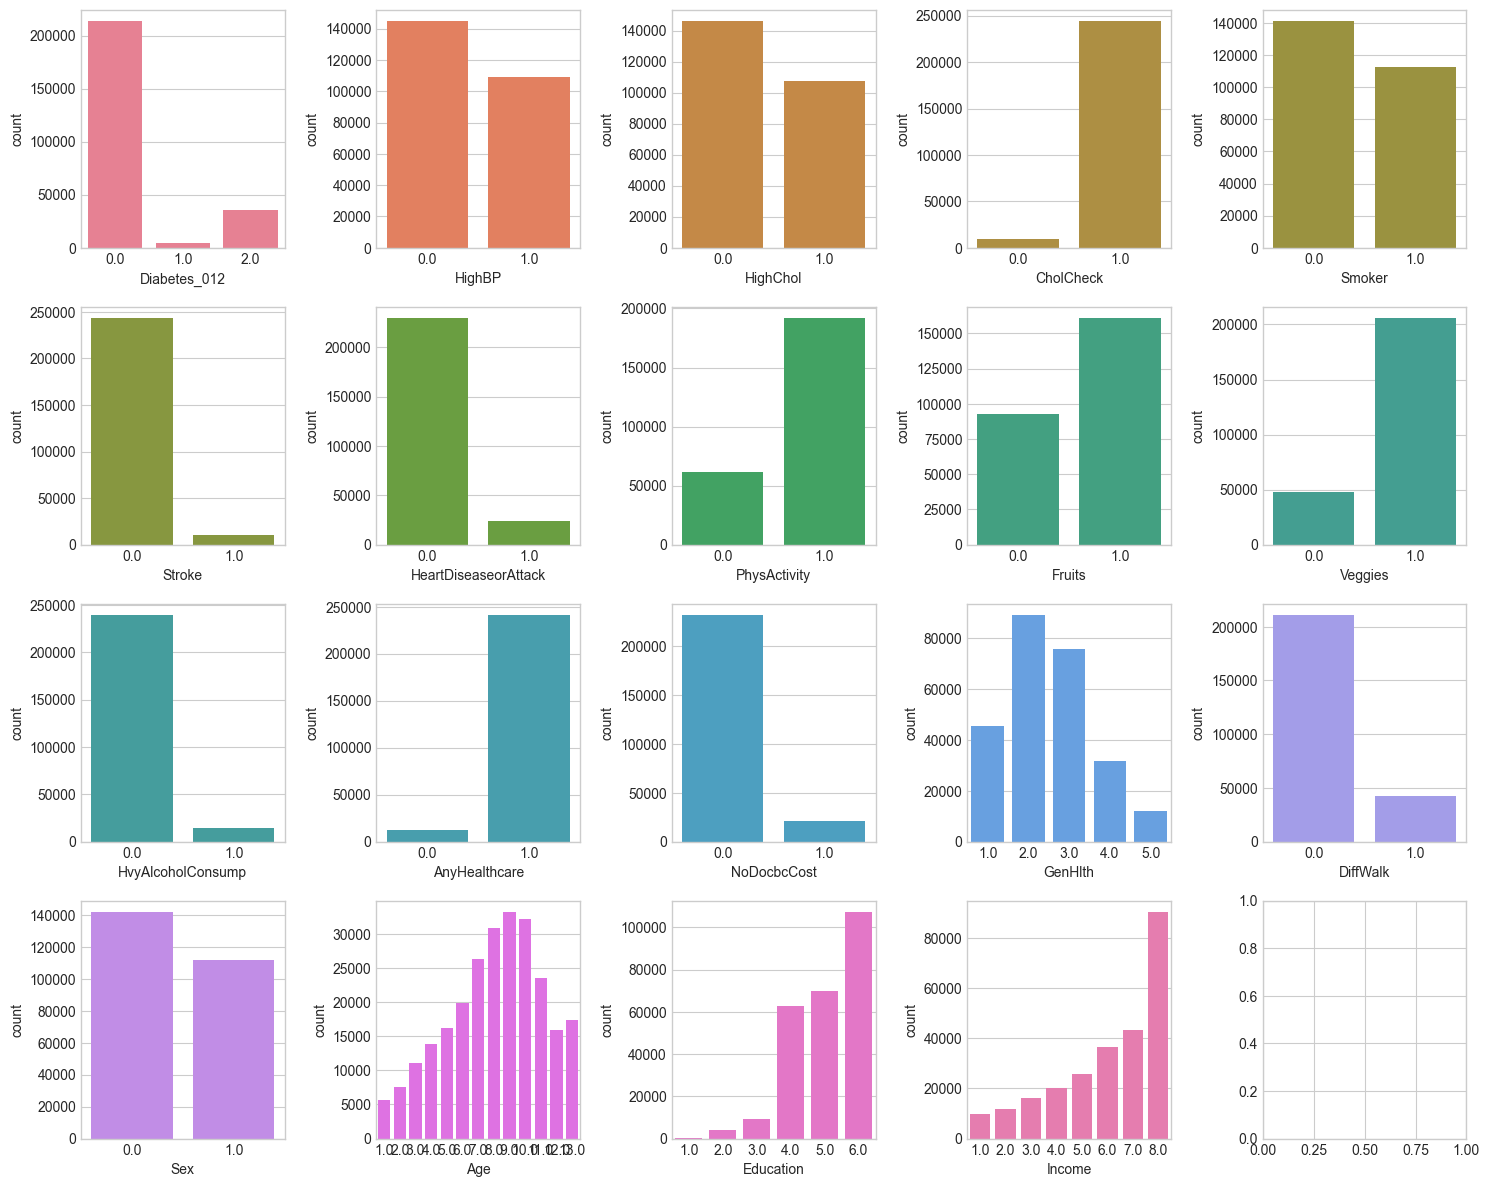

In [65]:
# vẽ histogram cho các biến định tính
df2 = df.copy()
df2.drop(columns=['BMI','MentHlth','PhysHlth'], inplace=True)

fig, axes = plt.subplots(nrows=int(np.ceil(len(df2.columns)/5)), ncols=5, figsize=(15, 12))

colors = sns.color_palette('husl', len(df2.columns))

for ax, col, color in zip(axes.flatten(), df2.columns, colors):
    sns.countplot(x=col, data=df2, ax=ax, color=color)

plt.tight_layout()
plt.show()

**Dữ liệu mất cân bằng trong số lượng người bị bệnh tiểu đường, cụ thể là tỉ lệ người không bị tiểu đường nhiều >> tỉ lệ người bị tiểu đường và tiền tiểu đường**

Các biến khác:
- Đa số các quan sát đã kiểm tra cholesterol trong 5 năm, chỉ một số ít chưa kiểm tra.
- Số lượng quan sát từng bị đột quỵ hoặc bị nhồi máu cơ tim thấp.
- Đa số quan sát có hoạt động thể chất trong vòng 30 ngày gần đây, khoảng hơn 1/5 quan sát là không.
- Số người ăn trái cây ít nhất một ngày gần gấp đôi số người không.
- Đa số các quan sát ăn rau củ quả mỗi ngày, chiếm hơn 4/5 toàn bộ quan sát.
- Đa số các quan sát không uống nhiều rượu.
- Đa số các quan sát đã tiếp cận các dịch vụ sức khỏe.
- Một số ít quan sát (khoảng dưới 50.000) không gặp bác sĩ trong vòng 12 tháng vì không có kinh phí.
- Đa số các tình trạng sức khỏe chung của quan sát đều ở mức Very Good (nhãn 2) và Good (nhãn 3).
- Có khoảng gần 50.000 quan sát gặp tình trạng khó khăn trong đi lại.
- Trình độ học vấn quan sát được trong mẫu ở mức 4,5,6 nhiều (6 là cao nhất) => **cân nhắc gộp nhãn hiếm (1,2,3)** 
- Thu nhập ở mức 8 (cao nhất) cũng có số lượng cao nhất và giảm dần ở các mức còn lại. 

In [33]:
df['Age'].describe()

count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64

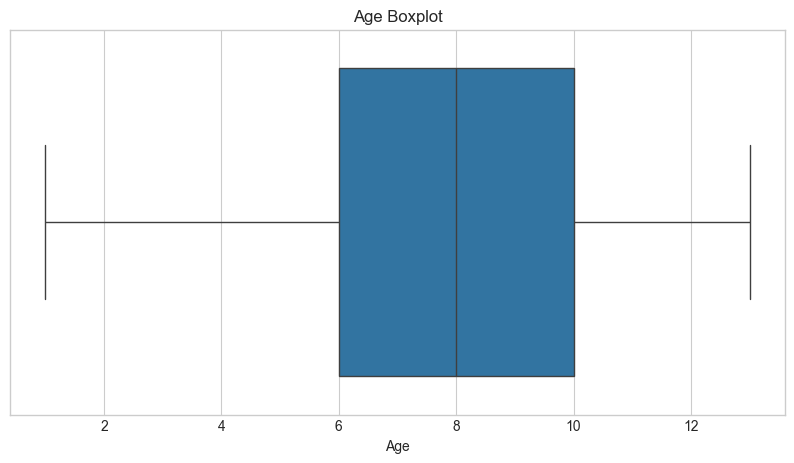

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', data=df, orient='h')
plt.title('Age Boxplot')
plt.show()

phần lớn các quan sát nằm trong **nhóm** tuổi từ 6-10, với nhóm 1 có độ tuổi từ 18-24, nhóm 2 từ 25-29, nhóm 3 từ 30-34,... thì mẫu này chứa nhiều quan sát trong nhóm tuổi từ 45-69.

Overview: Đa số các quan trắc trong dataset này nằm trong độ tuổi trung niên, có thu nhập khá tốt và cũng có lối sống lành mạnh. Qua đó cũng quan sát thấy số lượng các quan trắc không bị bệnh tiểu đường cũng chiếm đa số. 

Có thể đặt 1 giả định ở đây về quan hệ của các yếu tố được khảo sát và khả năng mắc bệnh tiểu đường. 

### Correlation

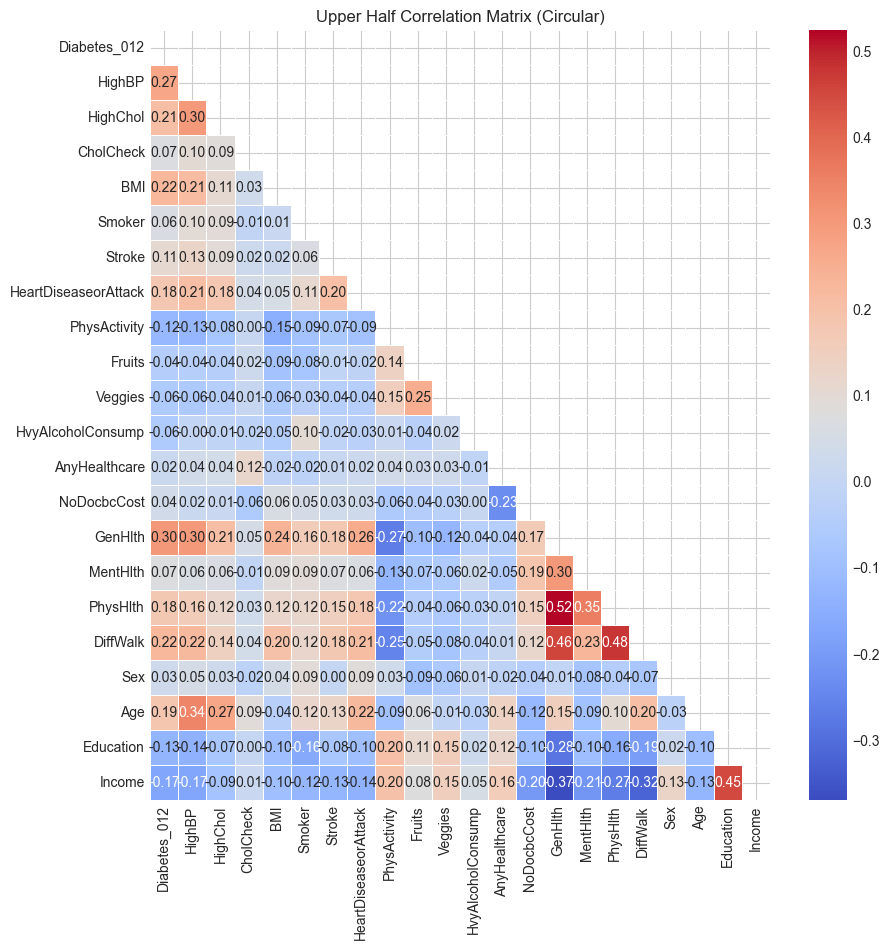

In [36]:
corr = df.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Upper Half Correlation Matrix (Circular)')
plt.show()


Một số biến trong dataset có tương quan mạnh với nhau:
- (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (Education, Income), (GenHlth, DiffWalk), (MenthHlth, PhysHlth): tương quan thuận
- (GenHlth, Income), (DiffWalk, Income): tương quan nghịch

Tương quan của các biến với biến Diabetes_012

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

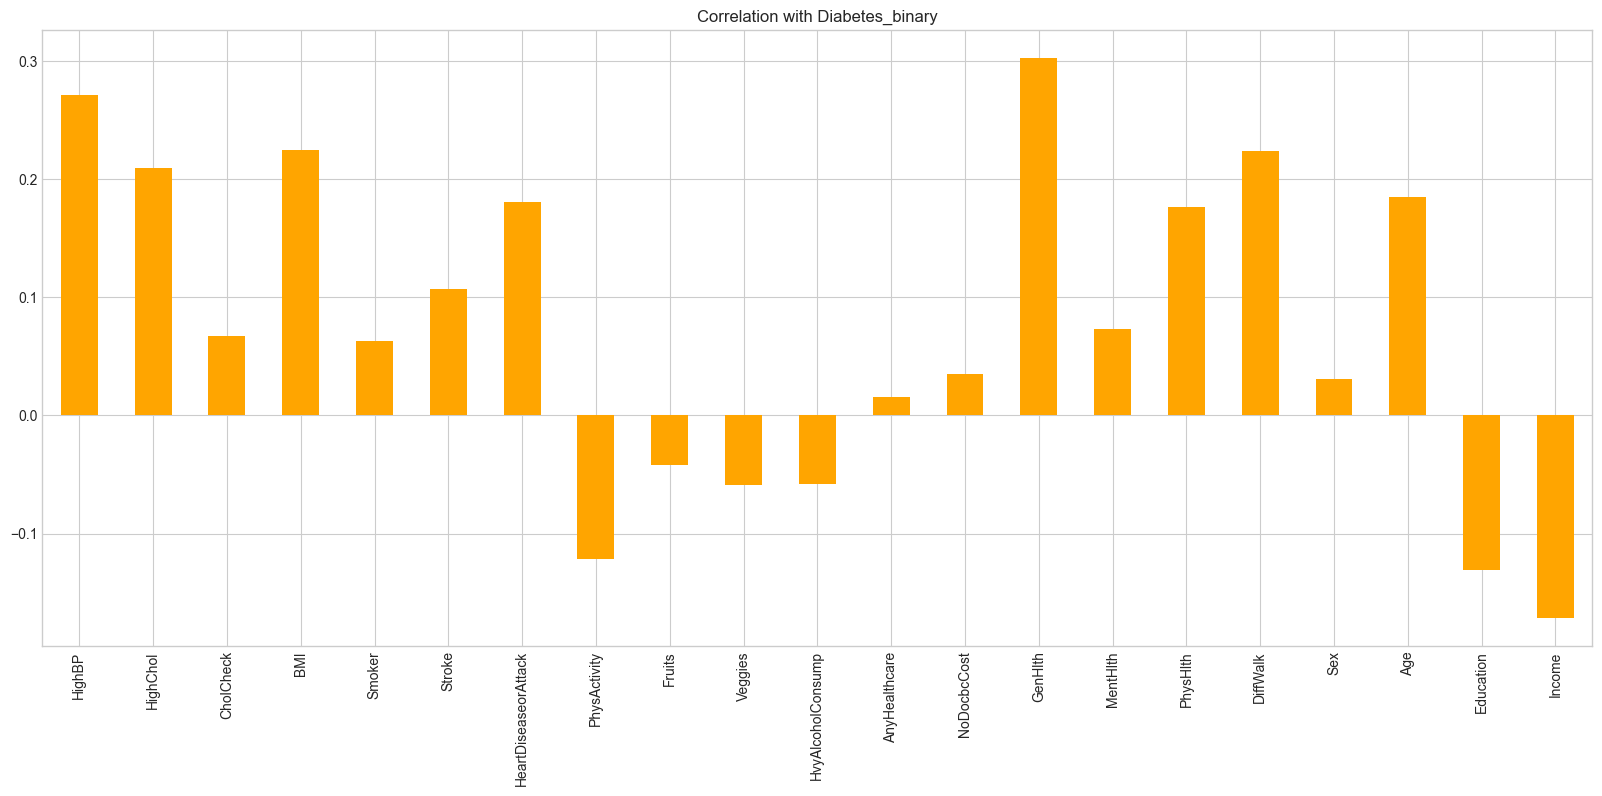

In [5]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8),\
                                                                      title="Correlation with Diabetes_binary",color="Orange")


hơn 1 nửa số biến có tương quan > 0.1 với biến phụ thuộc (Diabetes_012)

### Quan hệ của các biến định tính với biến phụ thuộc

#### Biến nhị phân

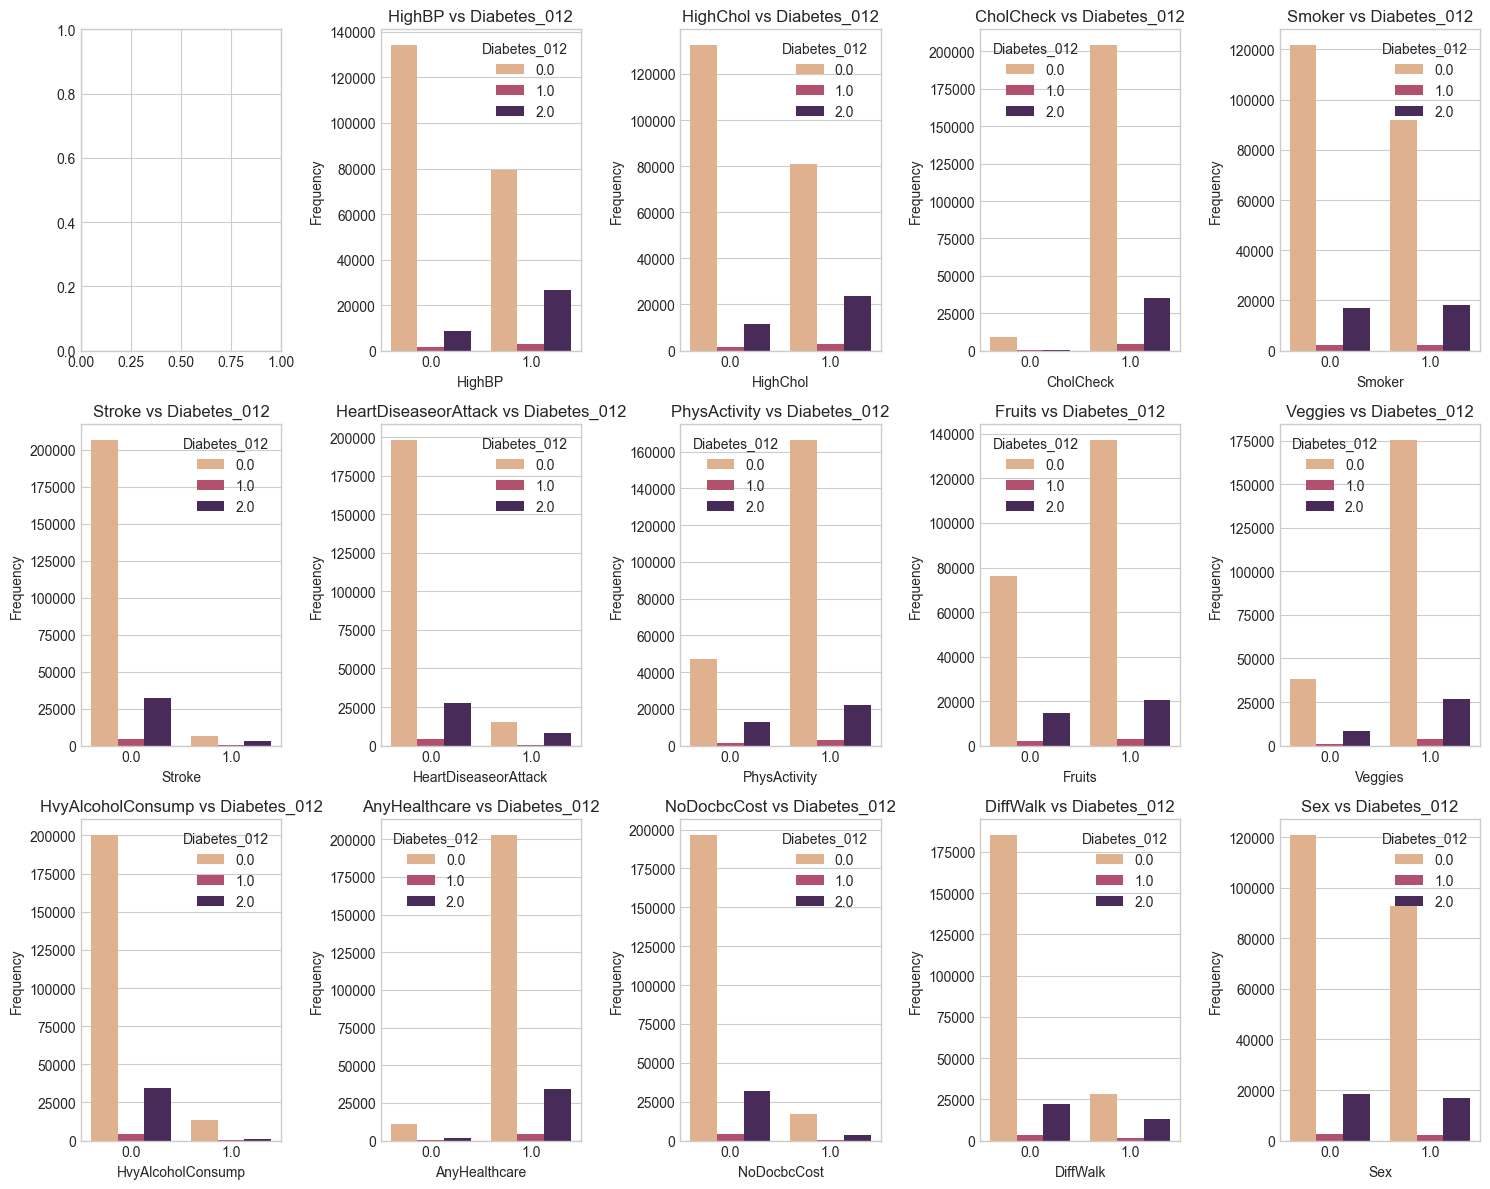

In [22]:
df2 = df.copy()
for col in df2.columns:
    if df2[col].nunique() != 2 and col != 'Diabetes_012':
        df2.drop(col, axis=1, inplace=True)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12))
i = 1

for ax, col in zip(axes.flatten(), df2.columns):
    if col != 'Diabetes_012':
        sns.countplot(x=col, hue='Diabetes_012', data=df2, ax=ax, palette='flare') 
        ax.set_title(f'{col} vs Diabetes_012')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# tính tỉ lệ phần trăm của biến Diabetes_012 theo các biến nhị phân 
# lưu các kết quả vào 1 dataframe mới
results = []

for col in df2.columns:
    if col != 'Diabetes_012':
        result = df2.groupby(col)['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)
        result.reset_index(inplace=True)
        result.columns = ['Name', 'No Diabetes', 'Pre Diabetes', 'Diabetes']
        result.Name = [col + '_0', col + '_1']
        results.append(result)

results_df = pd.concat(results, axis=0)
results_df.reset_index(drop=True, inplace=True)
results_df.head()

,Name,No Diabetes,Pre Diabetes,Diabetes
0,HighBP_0,0.927788,0.011860,0.060352
1,HighBP_1,0.728776,0.026767,0.244457
2,HighChol_0,0.908166,0.012020,0.079814
3,HighChol_1,0.753130,0.026722,0.220149
4,CholCheck_0,0.968004,0.006547,0.025449


In [45]:
# nếu tỉ lệ phần trăm của cột 'No Diabetes' chênh lệch nhiều hơn 10% khi so sánh mỗi 2 dòng thì in ra tên của biến đó
for i in range(0, len(results_df), 2):
    if abs(results_df.loc[i, 'No Diabetes'] - results_df.loc[i+1, 'No Diabetes']) > 0.1:
        print(results_df.loc[i, 'Name'][:-2])

HighBP
HighChol
CholCheck
Stroke
HeartDiseaseorAttack
PhysActivity
DiffWalk


=> các biến trên có ảnh hưởng đến khả năng mắc bệnh tiểu đường (cần kiểm định)

#### Các biến khác
 GenHlth, Age, Education, Income

Diabetes_012       0.0       1.0       2.0
GenHlth                                   
1.0           0.967924  0.006910  0.025166
2.0           0.914743  0.013628  0.071629
3.0           0.799262  0.022843  0.177894
4.0           0.657428  0.032468  0.310105
5.0           0.592004  0.029054  0.378942


Text(0.5, 1.0, 'Relation b/w GenHlth and Diabetes')

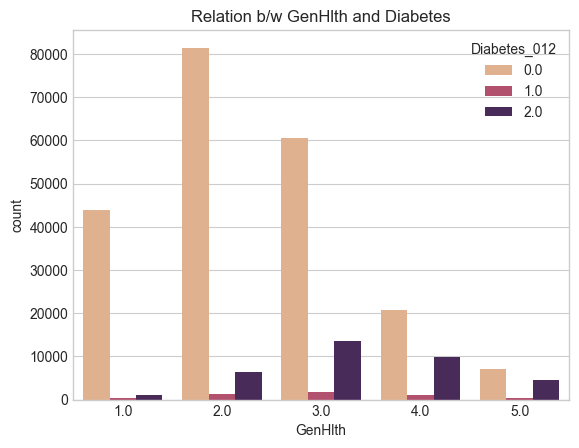

In [ ]:
# GenHlth
print(df.groupby('GenHlth')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["GenHlth"] ,data = df ,  hue = "Diabetes_012", palette='flare')   
plt.title("Relation b/w GenHlth and Diabetes")

Các trường hợp có sức khỏe Excellent (nhãn 1) và Very Good (nhãn 2) thì ít khả năng mắc bệnh tiểu đường. Ngược lại thì với nhãn 4 và 5 thì xác suất mắc bệnh tiểu đường khá cao. 

Diabetes_012       0.0       1.0       2.0
Age                                       
1.0           0.982632  0.003684  0.013684
2.0           0.974467  0.007107  0.018426
3.0           0.965297  0.006473  0.028230
4.0           0.944440  0.010273  0.045287
5.0           0.924862  0.010089  0.065049
6.0           0.896362  0.015742  0.087895
7.0           0.866763  0.015885  0.117352
8.0           0.843896  0.017839  0.138265
9.0           0.806431  0.021117  0.172452
10.0          0.774647  0.021650  0.203703
11.0          0.755960  0.025581  0.218459
12.0          0.759199  0.027847  0.212954
13.0          0.789092  0.026090  0.184818


Text(0.5, 1.0, 'Relation b/w Age and Diabetes')

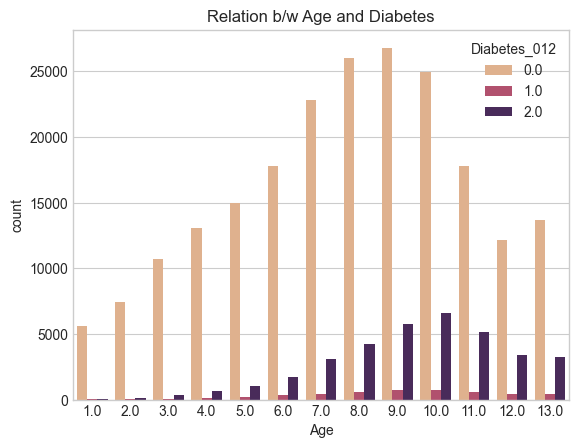

In [18]:
# Age 
print(df.groupby('Age')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["Age"] ,data = df ,  hue = "Diabetes_012", palette='flare')
plt.title("Relation b/w Age and Diabetes")

Dữ liệu quan sát được đa số quan trắc nằm trong nhóm tuổi từ 6-10. Khả năng mắc bệnh tiểu đường trong nhóm này tăng dần theo độ tuổi. Khả năng mắc bệnh ở nhóm 11 và 12 không tăng và giảm ở nhóm 13. 

Diabetes_012       0.0       1.0       2.0
Education                                 
1.0           0.718391  0.011494  0.270115
2.0           0.667574  0.039822  0.292605
3.0           0.724625  0.033129  0.242245
4.0           0.802135  0.021514  0.176351
5.0           0.832828  0.019067  0.148105
6.0           0.889392  0.013706  0.096902


Text(0.5, 1.0, 'Relation b/w Education and Diabetes')

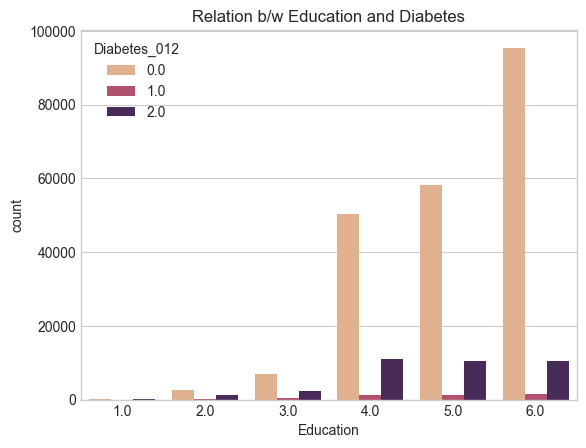

In [19]:
# Education
print(df.groupby('Education')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["Education"] ,data = df ,  hue = "Diabetes_012", palette='flare')
plt.title("Relation b/w Education and Diabetes")

Khả năng mắc bệnh tiểu đường có xu hướng giảm dần từ nhóm có trình độ học vấn thấp đến trình độ học vấn cao. 

(Số lượng người được khảo sát có trình độ học vấn từ 1->3 ở đây đang rất ít só với các nhóm còn lại nên có thể chưa phản ánh chính xác)

Diabetes_012       0.0       1.0       2.0
Income                                    
1.0           0.725104  0.032005  0.242891
2.0           0.707884  0.030213  0.261903
3.0           0.750594  0.026322  0.223084
4.0           0.775863  0.022796  0.201341
5.0           0.803307  0.022679  0.174014
6.0           0.834412  0.020510  0.145078
7.0           0.861172  0.017006  0.121821
8.0           0.909211  0.011185  0.079604


Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

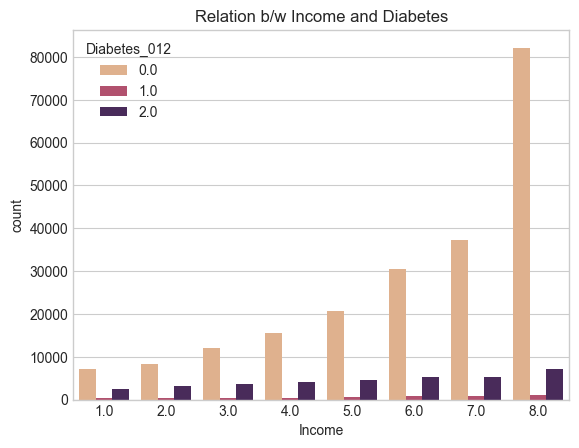

In [20]:
# Income
print(df.groupby('Income')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["Income"] ,data = df ,  hue = "Diabetes_012", palette='flare')
plt.title("Relation b/w Income and Diabetes")

Khả năng bị bệnh tiểu đường cũng có xu hướng giảm dần từ nhóm có thu nhập thấp đến nhóm có thu nhập cao.

Do đã quan sát thấy Education và Income có tương quan thuận, nên xu hướng cho 2 biến này lên biến phụ thuộc giống nhau. 

### Quan hệ của các biến định lượng với biến phụ thuộc

BMI, MentHlth, PhysHlth,

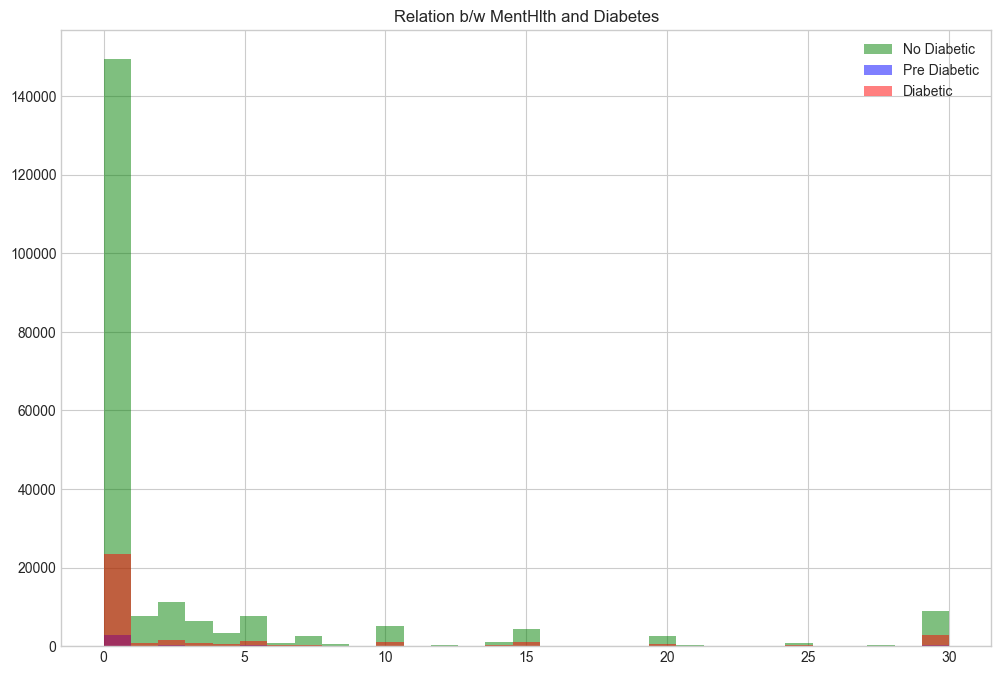

In [7]:
plt.figure(figsize=(12, 8))

plt.hist(df.MentHlth[df.Diabetes_012 == 0], bins=31, color="g", label="No Diabetic", alpha = 0.5)
plt.hist(df.MentHlth[df.Diabetes_012 == 1], bins=31, color="b", label="Pre Diabetic", alpha = 0.5)
plt.hist(df.MentHlth[df.Diabetes_012 == 2], bins=31, color="r", label="Diabetic", alpha = 0.5)

plt.title("Relation b/w MentHlth and Diabetes")
plt.legend()
plt.show()

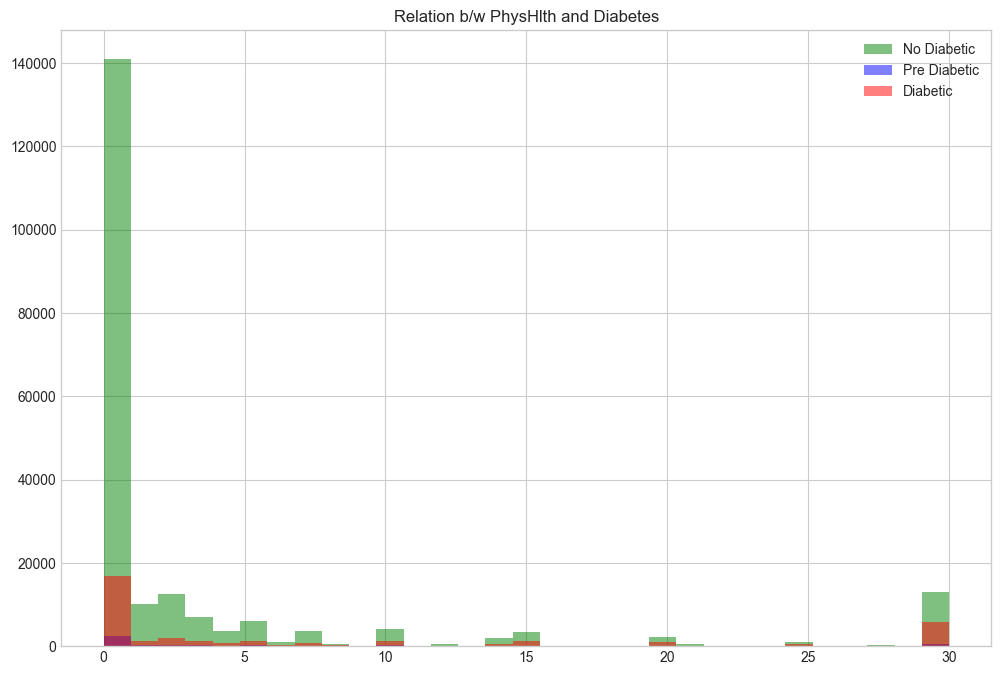

In [6]:
plt.figure(figsize=(12, 8))

plt.hist(df.PhysHlth[df.Diabetes_012 == 0], bins=31, color="g", label="No Diabetic", alpha = 0.5)
plt.hist(df.PhysHlth[df.Diabetes_012 == 1], bins=31, color="b", label="Pre Diabetic", alpha = 0.5)
plt.hist(df.PhysHlth[df.Diabetes_012 == 2], bins=31, color="r", label="Diabetic", alpha = 0.5)

plt.title("Relation b/w PhysHlth and Diabetes")
plt.legend()
plt.show()

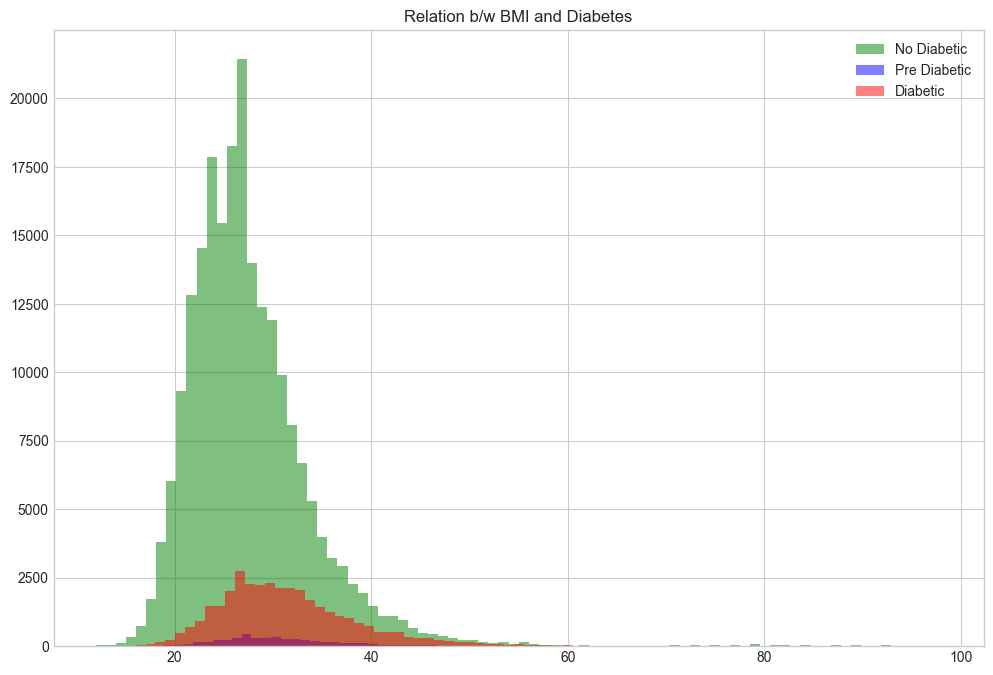

In [5]:
# BMI
plt.figure(figsize=(12, 8))

plt.hist(df.BMI[df.Diabetes_012 == 0], bins=84, color="g", label="No Diabetic", alpha=0.5)
plt.hist(df.BMI[df.Diabetes_012 == 1], bins=84, color="b", label="Pre Diabetic", alpha=0.5)
plt.hist(df.BMI[df.Diabetes_012 == 2], bins=84, color="r", label="Diabetic", alpha=0.5)

plt.title("Relation b/w BMI and Diabetes")
plt.legend()
plt.show()

đa số người bị tiểu đường hoặc tiền tiểu đường nằm trong khoảng BMI từ [20,50] 

có thể chia nhãn lại cho dữ liệu

### Quan hệ tương tác của các biến với biến phụ thuộc

### Summary

1 số biến có tương quan với nhau => có thể dẫn đến đa cộng tuyến => có thể ảnh hưởng đến logistic regression

Biến nhị phân cần kiểm định: HighBP, HighChol, CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, DiffWalk      
Các biến có ảnh hưởng lớn đến dự đoán: 

Quan sát các tương tác của các biến lên biến phụ thuộc để lựa chọn biến cho mô hình. 

**Preprocessing:**       
Dữ liệu về số lượng người mắc bệnh tiểu đường và không mắc bệnh không cân bằng => xử lí imbalanced data         
chia nhãn dữ liệu lại: Education, BMI

**Mục tiêu:** Dự đoán/Phân loại 1 người bị bệnh tiểu đường, tiền tiểu đường hoặc không bị bệnh tiểu đường, biến phụ thuộc: Diabetes_012